# Supervised Learning 

**Alberto Gonzalez Delgado**

12/2022

*(Dataset 12)*

## Introduction
Colorectal cancer early diagnosis and treatment can lead to a full recovery. Different individual response differntly to the tratment due to its genetic information. 
The different SNPs from different individuals that have been diagnoses with rectal colon cancer is presented as ('MM', 'WW','WM','MW'). The response of treatment is presented as R (good) or NR  (bad).

The dataset contains 53 individuals (rows), 21 features (associated to different SNPs), and 1 target value (‘Target’). The values of the data files retrieved are already transformed to 0 for ‘MM’, 1 for ‘WW’, 2 for ‘WM’, and 3 for ‘MW’ values in order to be compatible with all the ML learning models format.


### Importing neccesary dependencies

In [2]:
#Manipulation of the data
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype 

#Data isualization
import matplotlib.pyplot as pt

#Splitting the data
from sklearn.model_selection import train_test_split

#Cross-validation
from sklearn.model_selection import cross_val_score, KFold

#kNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#Logistic Regression
from sklearn.linear_model import LogisticRegression

### Loading data from file

I used pandas to read the csv file and I printed the first rows to have a preliminary visualization of the data



In [3]:
import pandas
df = pandas.read_csv('dataset12.csv')
df[0:5]

,Unnamed: 0,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,0,R,0,1,2,1,0,2,1,1,...,2,0,1,0,0,2,2,0,2,2
1,1,R,1,0,1,2,0,2,0,0,...,2,1,0,0,2,0,0,0,1,1
2,2,R,1,2,0,1,0,0,0,1,...,0,1,2,0,1,0,0,1,0,0
3,3,R,0,0,0,0,1,2,1,0,...,2,2,2,2,2,0,1,0,1,1
4,4,R,0,0,2,0,1,2,0,1,...,1,0,0,0,2,0,1,1,1,1


It can be seen that each patient (each row) has an ID. This ID will be deleted in order to don't use it in the training and testing process. The target column is the second one, which values can be R or NR. The rest of the columns are features associated to different SNPs which values can be 0 for ‘MM’, 1 for ‘WW’, 2 for ‘WM’, and 3 for ‘MW’

### Exploratory Data Analysis & Preprocessing

In [4]:
df=df.drop(columns='Unnamed: 0')
df[1:10]

,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
1,R,1,0,1,2,0,2,0,0,0,...,2,1,0,0,2,0,0,0,1,1
2,R,1,2,0,1,0,0,0,1,1,...,0,1,2,0,1,0,0,1,0,0
3,R,0,0,0,0,1,2,1,0,1,...,2,2,2,2,2,0,1,0,1,1
4,R,0,0,2,0,1,2,0,1,1,...,1,0,0,0,2,0,1,1,1,1
5,R,0,0,2,2,1,2,0,3,3,...,1,0,2,2,1,2,0,0,1,1
6,R,1,2,1,2,1,0,1,2,2,...,2,1,1,0,1,1,2,3,1,1
7,R,0,2,1,1,0,2,0,0,1,...,2,0,2,0,0,2,1,0,0,0
8,R,0,0,2,2,1,2,0,2,1,...,2,0,0,2,2,2,1,2,1,1
9,R,0,1,0,0,0,2,0,2,2,...,2,1,1,0,0,1,2,0,2,2


In [5]:
df.columns

Index(['Target', 'n_rs3188513', 'n_rs9960669', 'n_rs2602', 'n_rs5445365',
       'n_rs133061', 'n_rs10102851', 'n_rs8375668', 'n_rs3015353',
       'n_rs3229523', 'n_rs6236416', 'n_rs5274755', 'n_rs9280789',
       'n_rs2515462', 'n_rs9025039', 'n_rs94282819', 'n_rs344903', 'n_rs0370',
       'n_rs9072249', 'n_rs0220', 'n_rs833068', 'n_rs933069'],
      dtype='object')

Here I printed the name of the columns that corresponds to the features explained above. First, I will search if there is any duplicated row. Then, I will print some information and description about the data.

In [6]:
df.duplicated().sum()

0

There is not any duplicated row so it is not neccesary to clean the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Target        53 non-null     object
 1   n_rs3188513   53 non-null     int64 
 2   n_rs9960669   53 non-null     int64 
 3   n_rs2602      53 non-null     int64 
 4   n_rs5445365   53 non-null     int64 
 5   n_rs133061    53 non-null     int64 
 6   n_rs10102851  53 non-null     int64 
 7   n_rs8375668   53 non-null     int64 
 8   n_rs3015353   53 non-null     int64 
 9   n_rs3229523   53 non-null     int64 
 10  n_rs6236416   53 non-null     int64 
 11  n_rs5274755   53 non-null     int64 
 12  n_rs9280789   53 non-null     int64 
 13  n_rs2515462   53 non-null     int64 
 14  n_rs9025039   53 non-null     int64 
 15  n_rs94282819  53 non-null     int64 
 16  n_rs344903    53 non-null     int64 
 17  n_rs0370      53 non-null     int64 
 18  n_rs9072249   53 non-null     int64 
 19  n_rs0220  

All the columns are numeric, except target column. Since all the columns are non nullable, I will not search for null values in the data.

In [8]:
df.describe().transpose()[1:-1]

,count,mean,std,min,25%,50%,75%,max
n_rs9960669,53.0,1.396226,0.839863,0.0,1.0,2.0,2.0,2.0
n_rs2602,53.0,1.188679,0.833358,0.0,0.0,1.0,2.0,2.0
n_rs5445365,53.0,1.283019,0.769049,0.0,1.0,1.0,2.0,2.0
n_rs133061,53.0,0.830189,0.777962,0.0,0.0,1.0,1.0,2.0
n_rs10102851,53.0,1.547170,0.798220,0.0,1.0,2.0,2.0,2.0
n_rs8375668,53.0,0.660377,0.830741,0.0,0.0,0.0,1.0,2.0
n_rs3015353,53.0,1.056604,0.886113,0.0,0.0,1.0,2.0,3.0
n_rs3229523,53.0,0.849057,0.841158,0.0,0.0,1.0,1.0,3.0
n_rs6236416,53.0,1.245283,0.917892,0.0,0.0,2.0,2.0,2.0
n_rs5274755,53.0,1.396226,0.884473,0.0,1.0,2.0,2.0,3.0


In this visualization of some stadistics from the data, I eliminated the fisrt column, due to it is the patients ID and its stadistics is not informative. Since the target column is not numeric it is not printed. All the columns have the same number of rows. All the features have the same minimum (0: MM), whereas most of them have not MW SNP (3).

Since the features can only have as values 0,1,2 or 3 it can be supposed that all the features has the same scala.

The next plot shows the distribution of the data in each feature (diagonal) and the relationship between the data of each pair of features

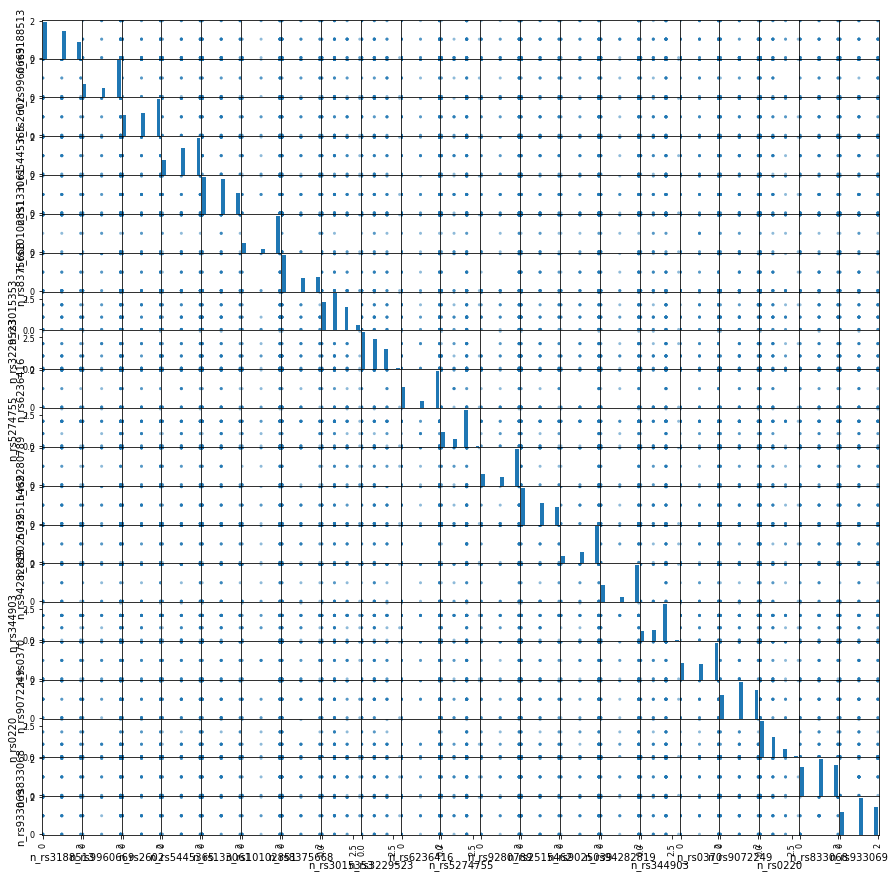

In [9]:
pd.plotting.scatter_matrix(df,figsize=(15,15))
pt.show()

As I told above, some of the features has not MW SNP (3) as it can be seen in the diagonal, since some of the features have not 4 columns. The features are related with each other between 9 and 16 goups (correspondient too 3 or 4 groups of SNPs). This plot also gives information about the scale, that is the same for all the features.

Since the target data is categorical, I will change it into numeric dut to most of the machine learning algorithms have problems with non-numeric data. If the treatment result was good (R), the value will be 1 and if the treatment result was bad (NR), the value will be 0. I did it manually since it is only two possible values.

In [10]:
df['Target']=df["Target"].map({"NR" :0, "R":1})

In [11]:
df[0:5]

,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,1,0,1,2,1,0,2,1,1,0,...,2,0,1,0,0,2,2,0,2,2
1,1,1,0,1,2,0,2,0,0,0,...,2,1,0,0,2,0,0,0,1,1
2,1,1,2,0,1,0,0,0,1,1,...,0,1,2,0,1,0,0,1,0,0
3,1,0,0,0,0,1,2,1,0,1,...,2,2,2,2,2,0,1,0,1,1
4,1,0,0,2,0,1,2,0,1,1,...,1,0,0,0,2,0,1,1,1,1


Here I'm creating two new variables:

* x: Features columns
* y: Target column

In [12]:
X = df.drop('Target', axis=1)
y = df['Target']

Since the categorical data has already been changed into numerical, I'm using CategoricalDtype from pandas.api.types (instead of OneHot Encoder so that all the columns have the posivility of having the four possible values and, as I said above, some columns have not 3 in some SNP). So that all the features have the same weight when calculating since it is not being computed the distance. The features will be splited into their 4 possible values (0,1,2,3) and the actual values will be 0 or 1. So, each SNP is now splitted into each possible value (0,1,2,3) and the values of each possible value of the SNP now is 0 (the patient has not this specific SNP) or 1 (the patien has this specific SNP).

In [13]:
cols=[X.columns[i] for i in range(len(X.columns))]
X[cols]=X[cols].astype(CategoricalDtype([0,1,2,3]))
x_f=pd.get_dummies(X[cols])

Here I print some columns of the new features data. Watch how now, each column in the raw data (i.e., n_rs3188513) has been splited into 4 columns (the posible values of the SNO n_rs3188513[_1],n_rs3188513[_2],n_rs3188513[_3],n_rs3188513[_4] )

In [14]:
x_f[0:5]

,n_rs3188513_0,n_rs3188513_1,n_rs3188513_2,n_rs3188513_3,n_rs9960669_0,n_rs9960669_1,n_rs9960669_2,n_rs9960669_3,n_rs2602_0,n_rs2602_1,...,n_rs0220_2,n_rs0220_3,n_rs833068_0,n_rs833068_1,n_rs833068_2,n_rs833068_3,n_rs933069_0,n_rs933069_1,n_rs933069_2,n_rs933069_3
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Since I have a little quantity of data (53), I splitted the data only into train and test sets. I used train_test_split from sklearn.model_selection. I used a random_state so the output is reproducible. I setted the train and test sizes following the most used splitting (0.7 / 0.3)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, train_size=0.7, test_size=0.3, random_state=5)

Here I display the distribution of the target values. 

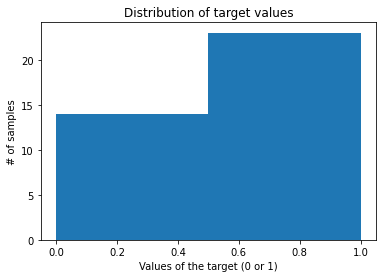

In [16]:
pt.hist(y_train,bins=2)
pt.title("Distribution of target values")
pt.ylabel("# of samples")
pt.xlabel("Values of the target (0 or 1)")
pt.show()

It can be seen that the target values are distributed, each one being approximately half of the total data (slightly more 1 than 0).

# Selecting the best model

In order to obtain the best model to predict how the target value will be depending on the input data (if the treatment will have good results depending on the SNP the patien has), I will compare the validation score for different classifiers. I will select the model that retreives the best score using k-fold cross validation.

I use k = number of samples in the training set because when the number of samples is low, using the number of folds equal to the number of samples allows for multiple validations of the test.

In [17]:
kf = KFold(n_splits=X_train.shape[0], shuffle=True, random_state=5)

## k-Nearest Neighbors (KNN) 
The k Nearest Neighbor (kNN) algorithm is used as a method for big data mining to predict the labels of test data by inducing all training data 
It is a non-parametric classification algorithm in which a labelled training dataset is provided where the data points are categorized into various classes, so that the class of an unlabelled data can be predicted. For a new input data, the k nearest neighbors is calculated and the majority label among the neighbouring data decides the label for this new input.

Since the data is categorical and it is can be compared if the values of each SNP feature (0,1) and the response to treatment (0,1) are the same number, I will use Cosine similarity measure.




Te maximum value of accuracy is: 0.8648648648648649


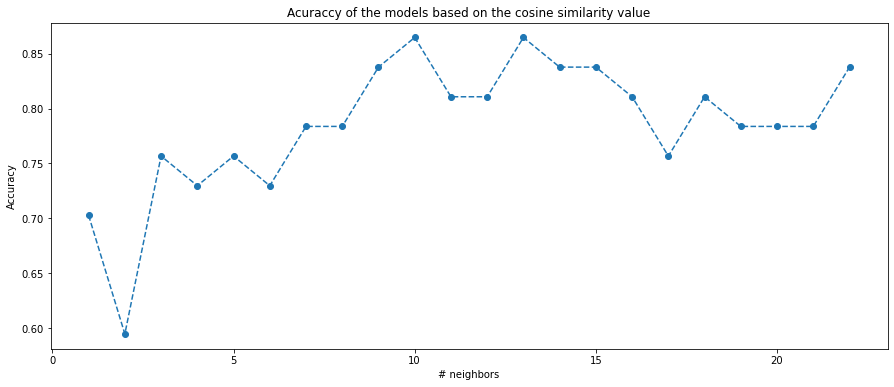

In [18]:
n_neighbors=range(1,23) #Defining a range of neighbors to test between different values
accuracy=[] # This array will contain the mean accuracy of each iteration 


# Iterating to caclulate different k in models, then return the average accuracy based on the cross validation
# References: https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4
for number in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = number ,metric='cosine')
    #training Classifier
    knn.fit(X_train, y_train)
    #K-fold cross-validation 
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    accuracy.append(scores.mean())
    #Plotting the results
pt.rcParams["figure.figsize"] = (15,6)
pt.title("Acuraccy of the models based on the cosine similarity value")
pt.xlabel("# neighbors")
pt.ylabel("Accuracy")
pt.plot(n_neighbors,accuracy, linestyle = 'dashed', marker = 'o',)
print(f'Te maximum value of accuracy is: {max(accuracy)}')

Based in this results, the best k-NN model would be using between k=10 and k=13  due to their accuracy (~0.8). After this value of k, the accuracy of the model get decreased due to under-fitting.

In order to select one of these models, I will create the model for this number of neighbors (10 and 13) and generate a report of validating scores. It is a summary of prediction results on a classification problem. It retrieves the errors and kind of errors that are being by the classifier, as would do the confusion matrix (Bownlee,J., 2016). I will print some parameters that can be used to validate the models.

In [27]:
#Training the model for k=10
knn_model = neighbors.KNeighborsClassifier (n_neighbors = 10, metric = 'cosine')
knn_model.fit(X_train, y_train)
print("F1:", cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='f1').mean())
print("Precision:", cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='precision').mean())
print("Recall:", cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='recall').mean())


F1: 0.7680952380952382
Precision: 0.825
Recall: 0.7416666666666666


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#Training the model for k=13
knn_model = neighbors.KNeighborsClassifier (n_neighbors = 13, metric = 'cosine')
knn_model.fit(X_train, y_train)
print("F1:", cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='f1').mean())
print("Precision:", cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='precision').mean())
print("Recall:", cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='recall').mean())


F1: 0.7871428571428571
Precision: 0.7666666666666667
Recall: 0.825


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CAMBIAR COMENTARIOS

F1 score is the harmonic mean of precision and sensivity. It is near to the highest possible score (1.0) that would mean perfect precision (true positive values / all positive values) and recall (true positive / all samples that should have been identified as positive: true positive rate).

The accuracy of this model for predicting is ~94% and its precision ~94-95% supported by 16 samples.

The true possitive rate (recall) is between 0.93-0.94 that means that near all the samples that sould have been indentified as positive, had been identified as positive, supported by 16 samples.

It can be said that this is really a good model to predict the labels on the target features based on SNP features.

Based on the same parameters as were explained above, this model is also a good model predicting the label in target colunmn, having the same capacity predicting labels on the target feature. However, the model that uses k=10 have better capacity in explaining the variability on the data. So, since the dataset is small and more data would help to create a better model, I would say that both models are equal when predicting the label. Whereas, since the model using k=10 is better explaining the variability on the data I would say that this model is the best for k-NN (k=10, accuracy=0.865)




## Logistic Regression Model

It is used to obtain odds ratio in the presence of more than one explanatory variable. The response variable is binomial: 0 as false 1 as true (Sperandei S., 2014). In other words, this model will try to predict two values: 1 (R) or 0 (NR) as responses of the treatment based on the SNP features.

I will do a Regression Model, using L2 penalty term (default choice, due to it always works with different solvers) and different Regularization strength (it is the inverse of C). This parameter solves over-fitting in machine learning models (https://www.statdeveloper.com/regresion-logistica-en-python/)  I used the solver 'liblinear' due to it is a good choice for small datasets, according to [sklearn.linear_model.LogisticRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Te maximum value of accuracy is: 0.7666666666666666


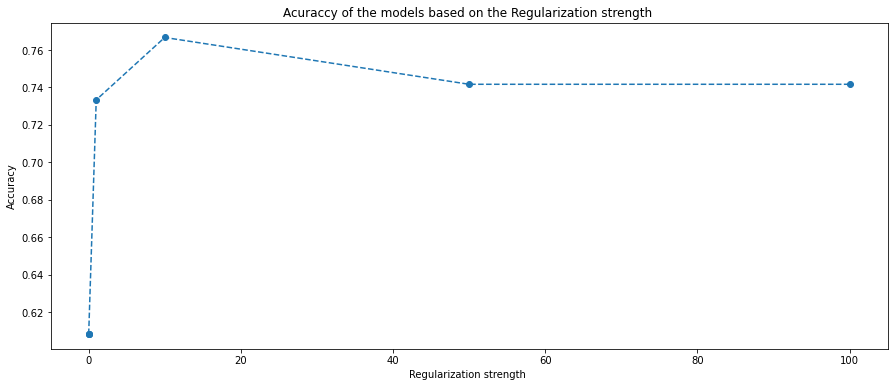

In [21]:
kf = KFold(n_splits=10, shuffle=True, random_state=5) #define the k fold cross validation
Cs=[0.0001,0.001,0.01,1,10,50,100]#Creating an array of some inverses of Regularization strength 
accuracy=[] # This array will contain the mean accuracy of each iteration 

#Iterating over the inverses values of regularization strength and saving the accuracys of each model
for c in Cs:
    # Creating an instance of Logistic Regression Classifier and fit the data.
    logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear')
    logreg.fit(X_train, y_train)
    scores = cross_val_score(logreg, X_train, y_train, cv = kf, scoring='accuracy')
    accuracy.append(scores.mean())
pt.rcParams["figure.figsize"] = (15,6)
pt.title("Acuraccy of the models based on the Regularization strength ")
pt.xlabel("Regularization strength ")
pt.ylabel("Accuracy")
pt.plot(Cs,accuracy, linestyle = 'dashed', marker = 'o',)
print(f'Te maximum value of accuracy is: {max(accuracy)}')

The best model based on the regularization strength is using c=10, which acuraccy is ~0.767.

In [25]:
logreg = LogisticRegression(C=10, max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)
print("F1:", cross_val_score(logreg, X_train, y_train, cv=kf, scoring='f1').mean())
print("Precision:", cross_val_score(logreg, X_train, y_train, cv=kf, scoring='precision').mean())
print("Recall:", cross_val_score(logreg, X_train, y_train, cv=kf, scoring='recall').mean())

F1: 0.768095238095238
Precision: 0.7583333333333333
Recall: 0.7916666666666666


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# COMENTAR

## Decision Trees



## Random Forest



# References

1. https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

2. https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4

3. Bownlee, J., 2016, What is a Confusion Matrix in Machine Learning. Available online: https://machinelearningmastery.com/confusion-matrix-machine-learning/ [Visited on 16/12/2022].

4. Sperandei S., 2014, Understanding logistic regression analysis. Biochem Med (Zagreb).  15;24(1):12-8. doi: 10.11613/BM.2014.003. PMID: 24627710; PMCID: PMC3936971.

5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

6. https://en.wikipedia.org/wiki/Receiver_operating_characteristic

7. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

8. https://www.statdeveloper.com/regresion-logistica-en-python/